In [1]:
%pip install tensorflow


[notice] A new release of pip is available: 23.3 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

## Loading MNIST dataset

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


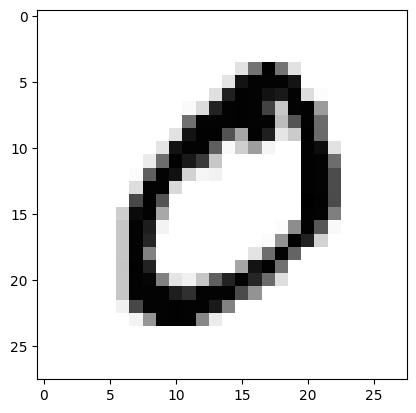

In [5]:
plt.imshow(x_train[1], cmap='Greys')

## Training with one-hot labels

In [6]:
model_lr = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
y_onehot_train = tf.one_hot(y_train, 10)
model_lr.fit(x_train, y_onehot_train)

1875/1875 [==============================] - 1s 345us/step - loss: 0.4708 - accuracy: 0.8775


## Training with sparse labels

In [8]:
model_lr = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# model_lr.fit(x_train, y_train)

In [10]:
history_lr = model_lr.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False)

## Review Traning Results

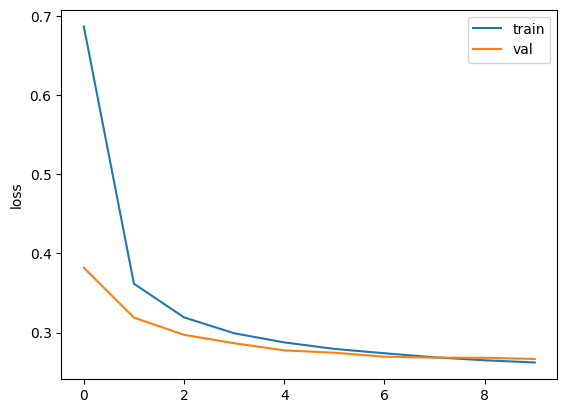

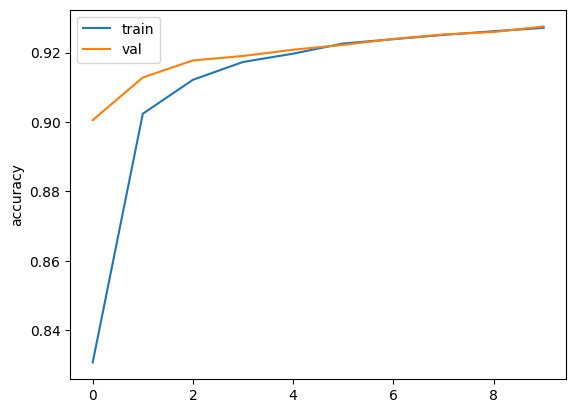

In [11]:
plt.plot(history_lr.history['loss'], label='train')
plt.plot(history_lr.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_lr.history['accuracy'], label='train')
plt.plot(history_lr.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [12]:
model_lr.evaluate(x_test, y_test)

313/313 [==============================] - 0s 308us/step - loss: 0.2667 - accuracy: 0.9275


[0.2667137682437897, 0.9275000095367432]

1/1 [==============================] - 0s 25ms/step
[5.3074623e-06 1.3939885e-10 1.7219711e-05 2.9693821e-03 3.7832220e-07
 2.0254573e-05 2.1754551e-09 9.9657059e-01 2.2106055e-05 3.9482169e-04]  =>  7


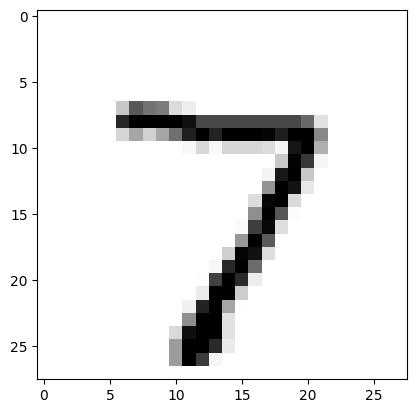

[4.5320499e-04 1.1598180e-05 9.8258370e-01 1.1835871e-03 8.6908388e-13
 3.8341621e-03 1.1729912e-02 1.9100371e-14 2.0370637e-04 4.2383690e-11]  =>  2


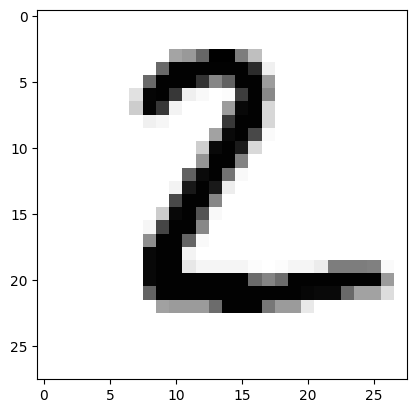

[5.3902522e-06 9.7376662e-01 1.2313966e-02 3.3111519e-03 1.9335026e-04
 8.2822464e-04 1.6855981e-03 2.7656858e-03 4.6781441e-03 4.5192605e-04]  =>  1


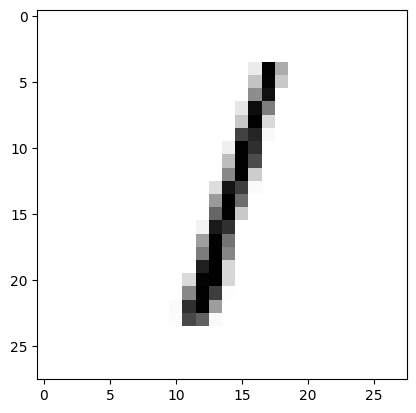

[9.9951339e-01 7.8962274e-11 7.0898146e-05 6.2197200e-06 4.0864869e-08
 1.2064322e-04 1.8865826e-04 3.9362058e-05 3.2059903e-05 2.8747547e-05]  =>  0


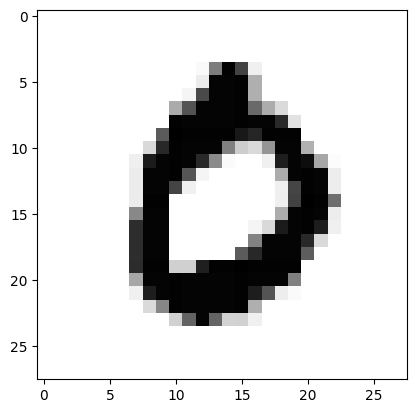

[3.5671290e-04 1.5276279e-06 2.1169418e-03 4.2975542e-05 9.5449948e-01
 1.3144547e-04 2.4108393e-03 3.8681973e-03 4.3062973e-03 3.2265488e-02]  =>  4


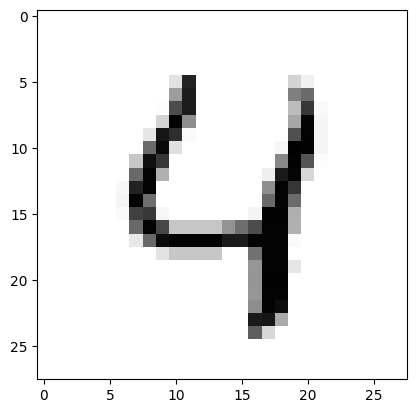

In [13]:
probs = model_lr.predict(x_test[:5])
preds = np.argmax(probs, axis=1)
for i in range(5):
    print(probs[i], " => ", preds[i])
    plt.imshow(x_test[i], cmap="Greys")
    plt.show()

In [14]:
model_lr.predict(x_test[18].reshape(1,28,28))

1/1 [==============================] - 0s 23ms/step


array([[1.3138063e-04, 3.7683276e-05, 9.9710777e-02, 7.3582685e-01,
        2.5762641e-04, 7.2956912e-02, 3.6401466e-02, 8.9805952e-05,
        5.4566048e-02, 2.1491482e-05]], dtype=float32)

In [15]:
model_lr.predict(x_test[18:19])

1/1 [==============================] - 0s 8ms/step


array([[1.3138063e-04, 3.7683276e-05, 9.9710777e-02, 7.3582685e-01,
        2.5762641e-04, 7.2956912e-02, 3.6401466e-02, 8.9805952e-05,
        5.4566048e-02, 2.1491482e-05]], dtype=float32)